In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from fastai import *
from fastai.tabular import *
from fastai.callbacks import *
from fastai.text import *
from fastai.data_block import *
from fastai.metrics import *
from sklearn.model_selection import StratifiedKFold
import pickle
from fastprogress import master_bar, progress_bar
from IPython.display import FileLink
from sklearn.decomposition import PCA
import time
from swallows.training import *

In [3]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 1000)

In [4]:
lm_type='full-60k'
# lm_type='full-30k'
# lm_type='samlple-30k'

In [5]:
path=Path('data')

In [6]:
# df_train = pd.read_csv(path/'nlp_train_sample.csv', low_memory=False)
df_train = pd.read_csv(path/'nlp_train.csv', low_memory=False)
df_test = pd.read_csv(path/'nlp_test.csv', low_memory=False)

In [8]:
df_all = df_train[['text']].append(df_test[['text']])
# df_all = df_train[['text']]

In [13]:
# max_vocab = 60k by default - seting it to lower value to make training faster
# txt_proc = [TokenizeProcessor(), NumericalizeProcessor(vocab=None, max_vocab=30000)]
# data_lm = (TextList.from_df(df_all, path=path, processor=txt_proc)
# data_lm = (TextList.from_df(df_all, path=path)
#            .split_by_rand_pct(0.05)
#            .label_for_lm()
#            .databunch(bs=192)
#           )
# print(f'Vocabulary size {len(data_lm.vocab.itos)}')

Vocabulary size 60004


In [14]:
# data_lm.save(f'data-lm-{lm_type}.pkl')

In [6]:
bs = 128 # 128 = 12502MiB

In [7]:
data_lm = load_data(path, f'data-lm-{lm_type}.pkl', bs=bs)

### LM Training

In [8]:
learn_nlp = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


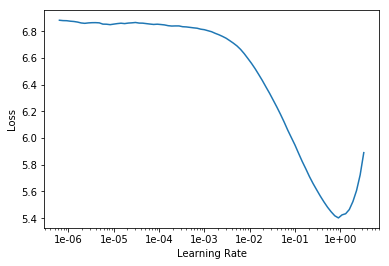

In [9]:
learn_nlp.lr_find(); learn_nlp.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.284623,1.087996,0.789037,1:34:04


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



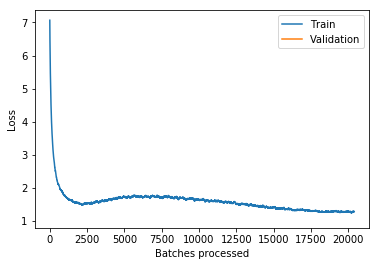

In [10]:
learn_nlp.fit_one_cycle(1, 1e-2, moms=(0.8,0.7)); learn_nlp.recorder.plot_losses()

In [12]:
#learn_nlp.save(f'lm-{lm_type}-1')

In [9]:
learn_nlp.load(f'lm-{lm_type}-1')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (1540520 items)
x: LMTextList
xxbos opstechit - xxup hou2 xxmaj project opstechit xxmaj manual opstechit xximpacthigh xxmaj equipment xxmaj request ( xxmaj new / xxmaj loaner ) xxup hou2 - xxup fc ( xxmaj houston , xxup tx ) xxmaj sort - xxup ar xxup houston xxup us xxup hou2 xxup tx xxmaj client xxmaj devices xxup hou2 - xxmaj singles problem solve request xxmaj building i d : xxup hou2 xxmaj workflow name : opstechit_devices_and_equipment_other xxmaj description : xxmaj problem xxmaj solve xxmaj stations on xxmaj line 3 , 4 , & 5 as well as xxmaj audit at xxmaj slam 6 in xxmaj pack xxmaj singles need to be fully setup as problem solve & xxmaj pack xxmaj stations . xxmaj each location must be fully functional for problem solve to pack out items . xxmaj in addition to work tables , equipment needed : xxmaj tape xxmaj dispensers , xxmaj dunnage xxmaj machines , xxmaj full xxmaj box xxmaj suites , xxmaj spoo xxmaj machines , p - xxm

In [10]:
learn_nlp.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


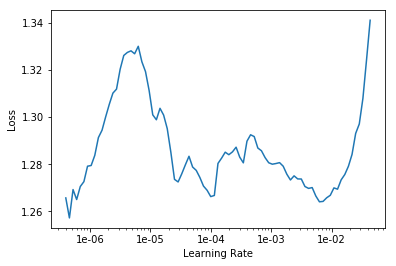

In [11]:
learn_nlp.lr_find(end_lr=1e-1); learn_nlp.recorder.plot()

In [12]:
learn_nlp.fit_one_cycle(5, 3e-4, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.892113,0.813254,0.838430,1:44:56
1,0.760822,0.706210,0.857561,1:44:56
2,0.711847,0.670144,0.863595,1:45:02
3,0.704369,0.655636,0.866044,1:44:49
4,0.686191,0.652765,0.866506,1:45:03


In [13]:
learn_nlp.save(f'lm-{lm_type}-tuned')

In [14]:
learn_nlp.save_encoder(f'{lm_type}-tuned-enc')

### Test

In [15]:
TEXT = "xximpactcritical Printer"
N_WORDS = 100
N_SENTENCES = 10
print("\n".join(learn_nlp.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

xximpactcritical Printer Thermal Printer Thermal Printer Thermal It Support Manual Helpdesk xximpactcritical Printer Issues BVA1 - FC ( Amiens , France ) nonsort Boves FR BVA1 EU HAUTS - DE - FRANCE Printers - Printing BVA1 : New Hire Tracking Ticket Hello , Could you please prepare and ship as necessary for the following new HVH HVH - HVH HVH Office Area : BVA1
xximpactcritical Printer Thermal Printer Issues SAT2 - FC ( San Marcos , TX ) Sort - AR SAN MARCOS US SAT2 TX Client Devices [ SAT2 ] Zebra Printer Cable Management This ticket is for Local IT to obtain a printer at the following locations to ensure they have all the equipment and cables , Parts Cage , Security Desk , Mouse , Keyboard , Scanner , Keyboard ,
xximpactcritical Printer DEL49-ATSPL SC ( Manesar - DL ) unknown MANESAR IN DEL49 IN HR Client Devices DEL49 - i need help resolving a Printer issue Building i d : DEL49 Workflow name : opstechit_printer Description : Hello IT support , Printer Name / Workstation Name : BOM9

```
xximpactcritical Printer MXP5-FC ( CSG , Piacenza , Italy ) Mixed CASTEL SAN GIOVANNI IT MXP5 EU SC Client Devices [ MXP5 ] [ MXP5 ] DAILY IT Storage Audit Hi Team , Please check the following : - Devices - Check print head , clean - up , clean and clean the air filter . - Check print head , clean and clean the air filter . - Check ensure that all cables are
xximpactcritical Printer PHL6 nonsort CARLISLE US PHL6 PA Client Devices [ PHL6 ] Pack line 3 SIOC station 2 Printer is not printing correctly . Can we get this fixed ? xxbos opstechit - HOU2 Trouble Ticket opstechit Manual opstechit xximpactcritical Printers HOU2 - FC ( Houston , TX ) Sort - AR HOUSTON US HOU2 TX Client Devices [ HOU2 ] AFE 1 Wall 4 station 6 is not
xximpactcritical Printer Battery Testing Pull 10 Batteries off the floor that are between 3 - 1 years in service . If batteries charges at 1 year old place in e - Cyle bin . If battery charges at > % 80 add to circulation xxpolicy xxbos opstechit - HAM2 Action Item opstechit Autocut opstechit - HAM2 xximpactcritical Audits HAM2 - FC ( Hamburg , Germany ) Sort - AR Winsen an der Luhe DE HAM2 EU HH
xximpactcritical Printer IND5 - FC nonsort PLAINFIELD US IND5 IN Client Devices [ IND5 ] Ship Dock Label Printer Hello , We have a Broadcast Printer that is in between the break room and the Outbound Ship Dock . The printer is located at the main break room . Please change it to the main office . xxbos opstechit - NRT1 Action Item opstechit Autocut opstechit - NRT1 xximpactcritical Audits NRT1 Sort
xximpactcritical Printer ONT2 Sort SAN BERNARDINO US ONT2 CA Client Devices [ ONT2 ] Printer Issue - Printer not printing . Printer is not printing . xxbos opstechit Trouble Ticket opstechit Chat opstechit xximpactcritical Other DPD1 - Del Stn ( Portland , OR ) deliverystation PORTLAND US DPD1 OR Client Devices [ DPD1 ] Incoming Chat- Now Unable to print INFO to gather- Login :
xximpactcritical Printer DEN2 - FC TNS ( Aurora , CO ) nonsort DENVER US DEN2 CO Client Devices DEN2 - 3 - 2 Printer Not Working TV mount is not working . Please replace it by going to the ERC . , Guy xxbos opstechit - BFI6 Trouble Ticket opstechit Manual opstechit - BFI6 xximpactcritical Other BFI6 - Fresh FC ( Kent , WA ) Fresh KENT US
xximpactcritical Printer DME1 - Dlvry stn(maidstone , UK ) deliverystation AYLESFORD UK DME1 EU KENT Client Devices [ DME1 ] Incoming Chat- the Zebra ZXP Series 7 Call Dialog- for contacting Centralized opstechit , my name is Nitesh how may i assist you ? Do you have a ticket for this issue or would you like me to create one on your behalf ? Info to gather- Login : Site : hostname : Contact info :
xximpactcritical Printer Testing Item Distribution Center Autocut opstechit - KTW1 xximpactcritical Audits KTW1 - fc(katowice , Poland ) Sort Sosnowiec PL KTW1 EU SILESIAN Site Administration [ KTW1 ] [ Daily ] IT Patrol Dear IT Technicians ! Choose one free IT Technician and let him do IT Patrol . Please go through all FC locations on Shop Floor and in Office areas . Check the following
xximpactcritical Printer PHX3 Specialty PHOENIX US PHX3 AZ Client Devices [ PHX3 ] [ Global Compliance ] Audit RF Scanner Collection Bins Collect , audit and remediate any defective RF Scanner found in a defect bin located in the FC . In addition , any RF Scanner found abandoned in the FC should be considered defective and an audit should be performed . Follow Audit SOP : xxpolicy xxbos opstechit - BCN1 Trouble
xximpactcritical Printer LTN2 - Hemel Hempstead , UK Sort HEMEL HEMPSTEAD UK LTN2 EU HERTFORDSHIRE Client Devices [ LTN2 ] Printer on SLAM KO is not working . Please resolve this issue . xxbos opstechit - MDW4 Trouble Ticket opstechit Autocut opstechit xximpactmedium Other MDW4 - FC ( Joliet , IL ) Sort JOLIET US MDW4 IL Network and Telecom [ MDW4 ] Device man1-co-acc-sw0701.amazon.com failed
```